In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df = df.drop('customerID', axis=1)
target = df.Churn

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [8]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
le = LabelEncoder()

In [10]:
for n in object_columns:
    df[n] = le.fit_transform(df[n])

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [12]:
df.dtypes.value_counts()

int64      19
float64     1
Name: count, dtype: int64

In [13]:
any_match = df[df.isin(['NaN']).any(axis=1)]
print(any_match)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [14]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
gender,0.0,0.0
SeniorCitizen,0.0,0.0
Partner,0.0,0.0
Dependents,0.0,0.0
tenure,0.0,0.0
PhoneService,0.0,0.0
MultipleLines,0.0,0.0
InternetService,0.0,0.0
OnlineSecurity,0.0,0.0
OnlineBackup,0.0,0.0


In [15]:
# count_y = (df['Churn'] == 'Yes').sum()
# count_n = (df['Churn'] == 'No').sum()

count_y = (df['Churn'] == '1').sum()
count_n = (df['Churn'] == '0').sum()

print(f"Количество 'Yes': {count_y}")
print(f"Количество 'No': {count_n}")

Количество 'Yes': 0
Количество 'No': 0


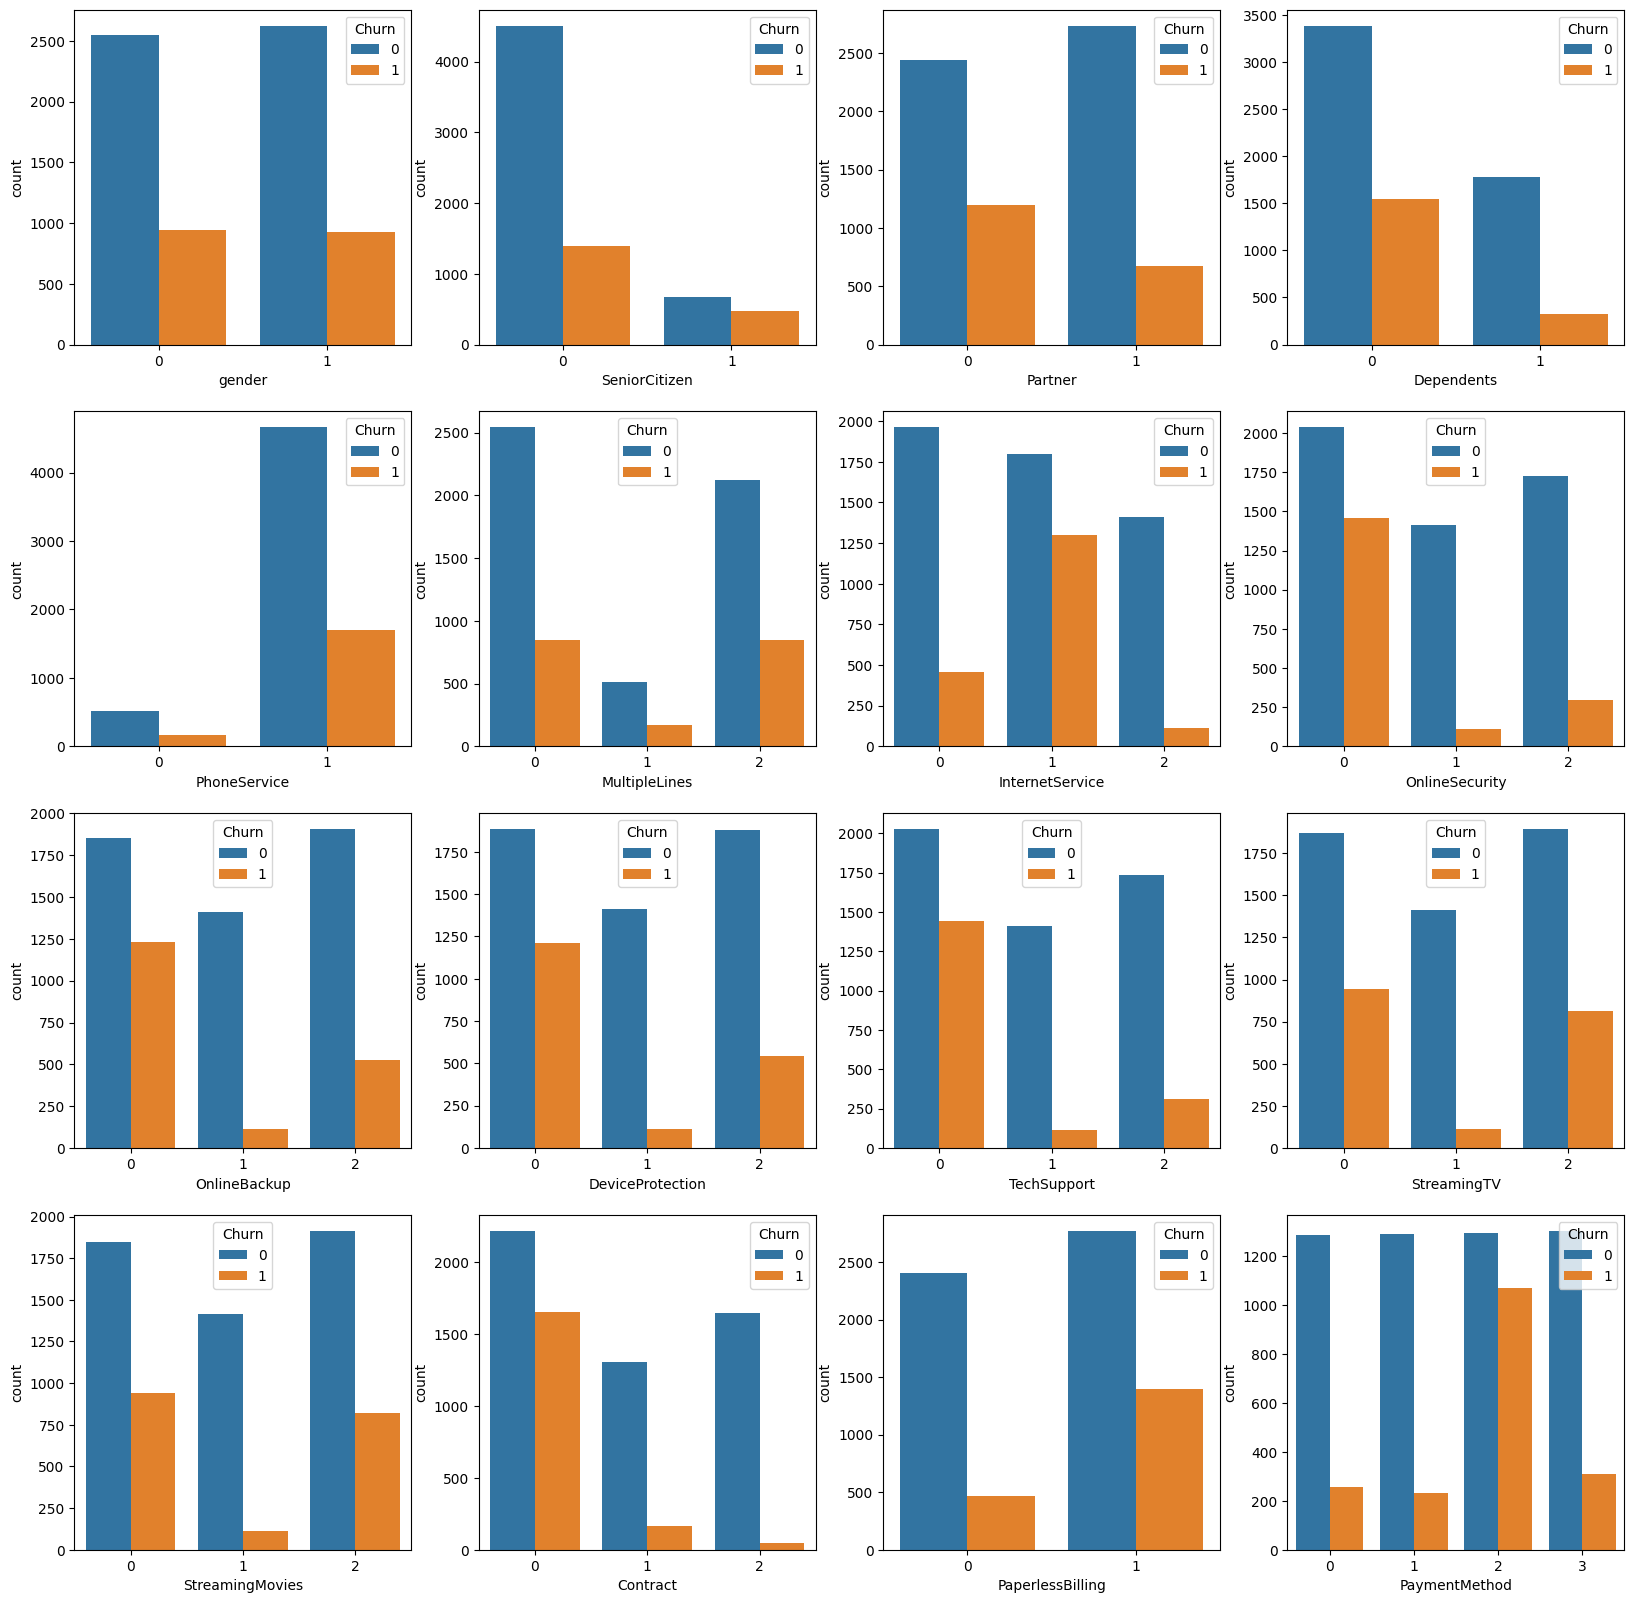

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

columns = ['gender','SeniorCitizen', 'Partner', 'Dependents', 
           'PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.countplot(data=df, x=col, hue='Churn',ax=axs[row, col_idx])

plt.show()

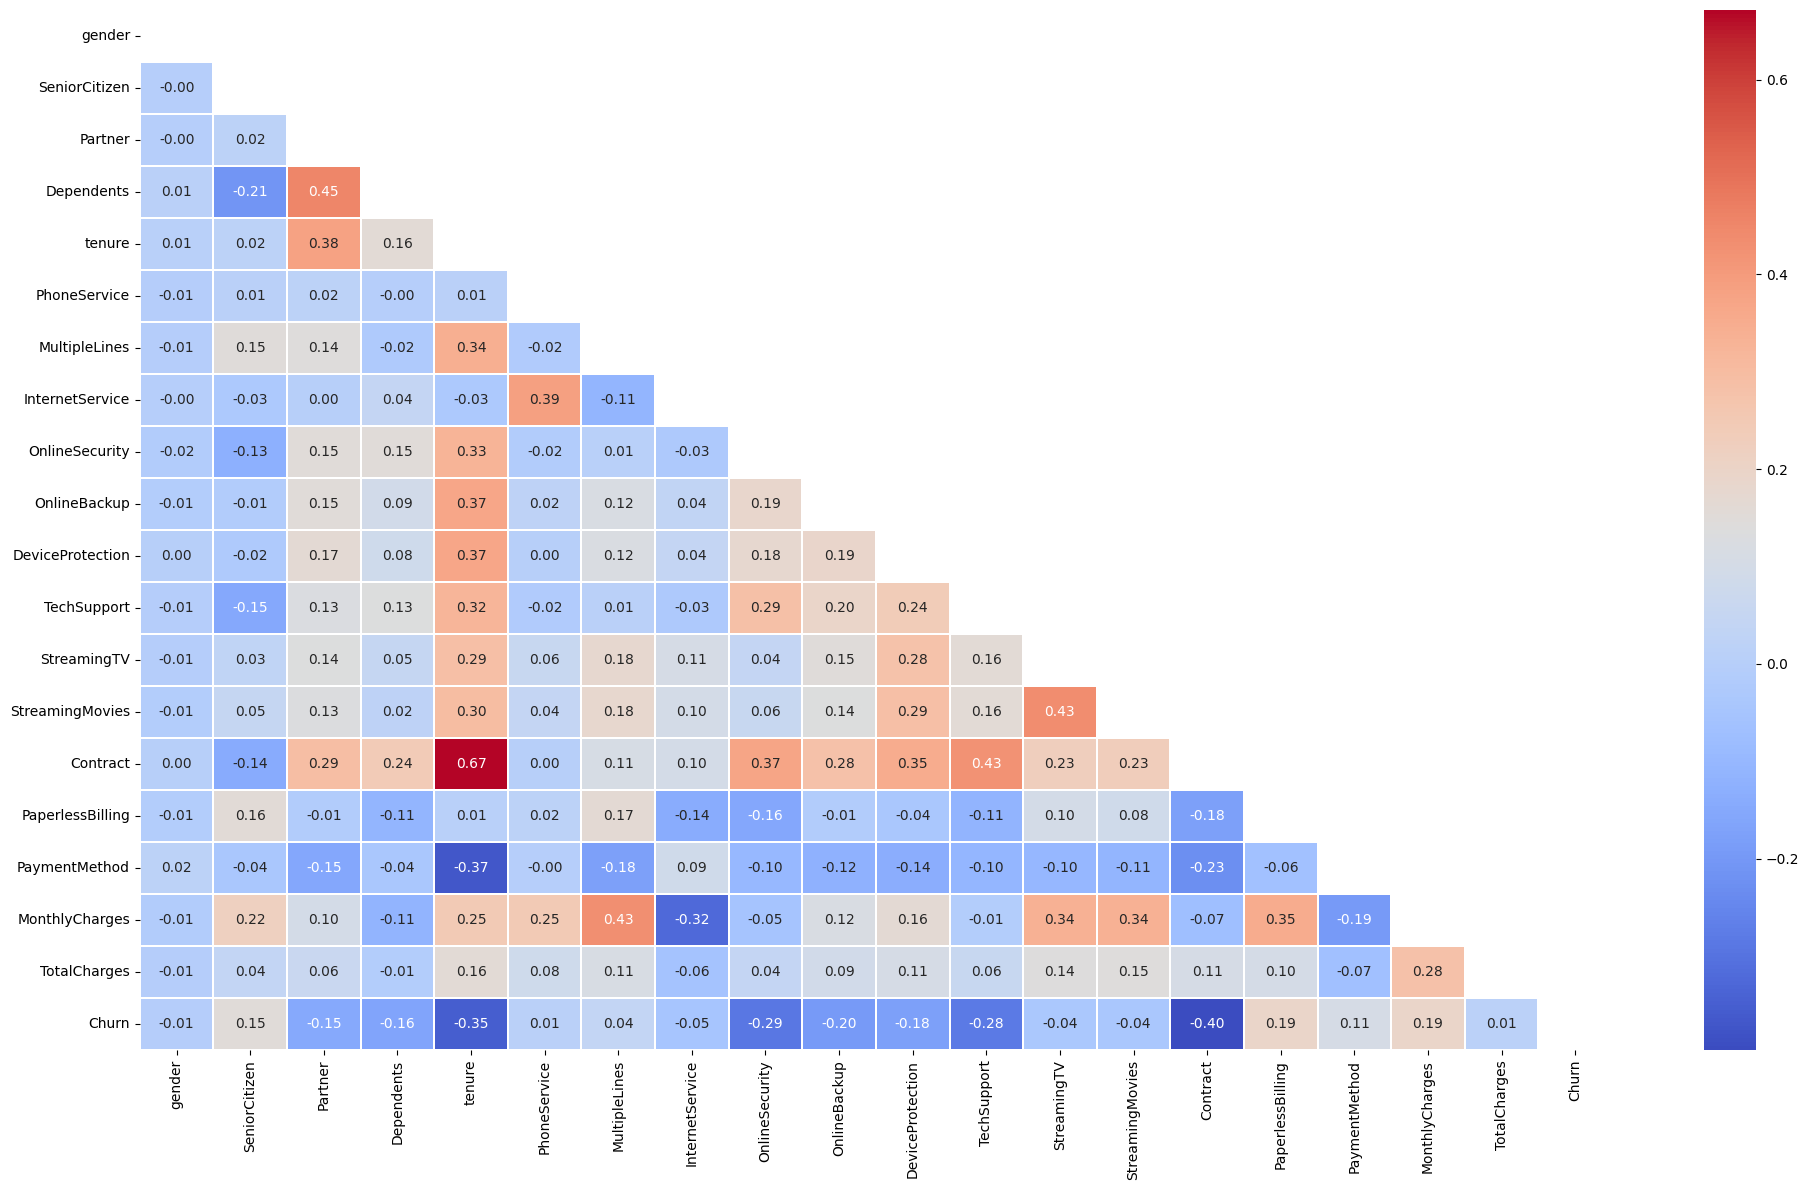

In [17]:
df_corr = df
df_corr = df_corr.corr()

plt.figure(figsize=(20,12))
sns.heatmap(df_corr, linewidths=0.1, annot=True, fmt = ".2f", cmap = 'coolwarm', mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.tight_layout()
plt.show()

In [18]:
def quality_report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction, average='weighted'),
        recall_score(actual, prediction, average='weighted'),
        f1_score(actual, prediction, average='weighted')
    ))

In [19]:
X = df.drop(['Churn'], axis=1)
Y = df['Churn']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

In [110]:
gbr_model = GradientBoostingClassifier()
gbr_model.fit(x_train, y_train)
gbr_pred = gbr_model.predict(x_test)
print(roc_auc_score(y_test, gbr_model.predict_proba(x_test)[:, 1]))
quality_report(y_test, gbr_pred)

0.8380762215851664
Accuracy: 0.789
Precision: 0.776
Recall: 0.789
f1_score: 0.778


In [111]:
cb = CatBoostClassifier(logging_level='Silent')
cb.fit(x_train, y_train)
cb_pred = cb.predict(x_test)
print(roc_auc_score(y_test, cb.predict_proba(x_test)[:, 1]))
quality_report(y_test, cb_pred)

0.8310523365859933
Accuracy: 0.788
Precision: 0.777
Recall: 0.788
f1_score: 0.780


In [112]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)

print(roc_auc_score(y_test, lgbm.predict_proba(x_test)[:, 1]))
quality_report(y_test, lgbm_pred)

0.8219748653913298
Accuracy: 0.780
Precision: 0.769
Recall: 0.780
f1_score: 0.773


In [113]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = cb.predict(x_test)

print(roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1]))
quality_report(y_test, lgbm_pred)

0.8157004015289339
Accuracy: 0.780
Precision: 0.769
Recall: 0.780
f1_score: 0.773


In [66]:
%%time

parameters = {'n_estimators': [3, 5, 10, 50, 100], 
              'learning_rate' : [0.5, 0.2, 0.1, 0.05, 0.01], 
              'max_depth':[None, 3, 5, 10, 15],
              'min_samples_split' : [2, 3, 5, 7, 9]}

model = GradientBoostingClassifier()
clf = GridSearchCV(model, parameters, cv=5, verbose=1, scoring = 'accuracy', n_jobs=-1)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
# clf_proba = clf.predict_proba(x_test)
print(f'Actual test score: {accuracy_score(y_test, clf_pred):.4f}')
print('Best parameters: ', clf.best_params_)
clf_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Actual test score: 0.7979
Best parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 7, 'n_estimators': 100}
ROC-AUC: 0.8412260874359115
Accuracy: 0.798
Precision: 0.786
Recall: 0.798
f1_score: 0.786
CPU times: user 6.26 s, sys: 2.25 s, total: 8.5 s
Wall time: 4min 39s


In [67]:
model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, min_samples_split=7, n_estimators=100)
model.fit(x_train, y_train)
model_pred = clf.predict(x_test)
model_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

ROC-AUC: 0.8412260874359115
Accuracy: 0.798
Precision: 0.786
Recall: 0.798
f1_score: 0.786


In [71]:
%%time

parameters = {
              # 'iterations' : [3, 5, 10, 50, 100], 
              'learning_rate' : [0.5, 0.2, 0.1, 0.05, 0.01], 
              'depth':[None, 3, 5, 10, 15],
              'n_estimators' : [1, 5, 10, 50, 100]}

model = CatBoostClassifier(logging_level="Silent")
clf = GridSearchCV(model, parameters, cv=5, verbose=1, scoring = 'accuracy', n_jobs=-1)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
# clf_proba = clf.predict_proba(x_test)
print(f'Actual test score: {accuracy_score(y_test, clf_pred):.4f}')
print('Best parameters: ', clf.best_params_)
clf_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Actual test score: 0.7998
Best parameters:  {'depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
ROC-AUC: 0.8431648198173365
Accuracy: 0.800
Precision: 0.788
Recall: 0.800
f1_score: 0.790
CPU times: user 478 ms, sys: 297 ms, total: 774 ms
Wall time: 2min 7s


In [133]:
%%time

parameters = {
              'subsample' : [0.5, 0.7, 0,9, 1], 
              'learning_rate' : [0.2, 0.1, 0.05, 0.01], 
              'max_depth':[2, 3, 4, 5],
              'n_estimators' : [100, 300, 400, 500]}

model = LGBMClassifier(verbosity=-1)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    clf = GridSearchCV(model, parameters, cv=3, verbose=0, scoring = 'accuracy', n_jobs=-1)
    clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
# clf_proba = clf.predict_proba(x_test)
print(f'Actual test score: {accuracy_score(y_test, clf_pred):.4f}')
print('Best parameters: ', clf.best_params_)
clf_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, an

Actual test score: 0.7984
Best parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.5}
ROC-AUC: 0.8401648381939467
Accuracy: 0.798
Precision: 0.787
Recall: 0.798
f1_score: 0.789
CPU times: user 1.4 s, sys: 1.18 s, total: 2.59 s
Wall time: 3min 39s


In [44]:
%%time

parameters = {'n_estimators': [3, 5, 10, 50, 100], 
              'learning_rate' : [0.5, 0.2, 0.1, 0.05, 0.01], 
              'max_depth':[None, 3, 5, 10, 15],
              'subsample' : [1, 0.7, 0.5, 0.3, 0.1]}

model = XGBClassifier()
clf = GridSearchCV(model, parameters, cv=5, verbose=1, scoring = 'accuracy', n_jobs=-1)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
# clf_proba = clf.predict_proba(x_test)
print(f'Actual test score: {accuracy_score(y_test, clf_pred):.4f}')
print('Best parameters: ', clf.best_params_)
clf_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [51]:
data = {
    "Model": [
        "GradientBoostingClassifier",
        "CatBoostClassifier",
        "LGBMClassifier",
        "XGBClassifier"
    ],
    "ROC-AUC Score": [
        0.8380762215851664,
        0.8310523365859933,
        0.8219748653913298,
        0.8157004015289339
    ],
    "Accuracy": [
        0.789,
        0.788,
        0.780,
        0.780
    ],
    "Precision": [
        0.776,
        0.777,
        0.769,
        0.769
    ],
    "Recall": [
        0.789,
        0.788,
        0.780,
        0.780
    ],
    "F1 Score": [
        0.778,
        0.780,
        0.773,
        0.773
    ]
}

results_df = pd.DataFrame(data)
print('Результаты моделей "из коробки"')
results_df

Результаты моделей "из коробки"


,Model,ROC-AUC Score,Accuracy,Precision,Recall,F1 Score
0,GradientBoostingClassifier,0.838076,0.789,0.776,0.789,0.778
1,CatBoostClassifier,0.831052,0.788,0.777,0.788,0.780
2,LGBMClassifier,0.821975,0.780,0.769,0.780,0.773
3,XGBClassifier,0.815700,0.780,0.769,0.780,0.773


In [56]:
pd.set_option('display.max_colwidth', None)
data = {
    "Model": [
        "GradientBoostingClassifier",
        "CatBoostClassifier",
        "LGBMClassifier"
    ],
    "Act Test Score": [
        0.7979,
        0.7998,
        0.7984
    ],
    "ROC-AUC": [
        0.8412260874359115,
        0.8431648198173365,
        0.8401648381939467
    ],
    "Accuracy": [
        0.798,
        0.800,
        0.798
    ],
    "Precision": [
        0.786,
        0.788,
        0.787
    ],
    "Recall": [
        0.798,
        0.800,
        0.798
    ],
    "F1 Score": [
        0.786,
        0.790,
        0.789
    ],
    "Best Parameters": [
        "l_rate: 0.05, m_depth: 3, min_smpl_splt: 7, n_estim': 100",
        "depth': 5, 'l_rate': 0.1, 'n_estim': 50",
        "l_rate: 0.05, depth: 2, n_estim: 300, subsample: 0.5"
    ],
}


results_df = pd.DataFrame(data)
print('Результаты моделей с "тюнингом" основных гиперпараметров')
results_df

Результаты моделей с "тюнингом" основных гиперпараметров


,Model,Act Test Score,ROC-AUC,Accuracy,Precision,Recall,F1 Score,Best Parameters
0,GradientBoostingClassifier,0.7979,0.841226,0.798,0.786,0.798,0.786,"l_rate: 0.05, m_depth: 3, min_smpl_splt: 7, n_estim': 100"
1,CatBoostClassifier,0.7998,0.843165,0.800,0.788,0.800,0.790,"depth': 5, 'l_rate': 0.1, 'n_estim': 50"
2,LGBMClassifier,0.7984,0.840165,0.798,0.787,0.798,0.789,"l_rate: 0.05, depth: 2, n_estim: 300, subsample: 0.5"
